In [1]:
# IMPORTING LIBRARIES
import pandas as pd 
from bs4 import BeautifulSoup
import numpy as np
import requests
import time
import os
import re
from urllib.request import Request, urlopen
import ssl
import pickle
import wget
import openpyxl 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
import PIL 

In [2]:
# reading the csv file
df=pd.read_csv('final_df.csv',header=[0,1,2,3])

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


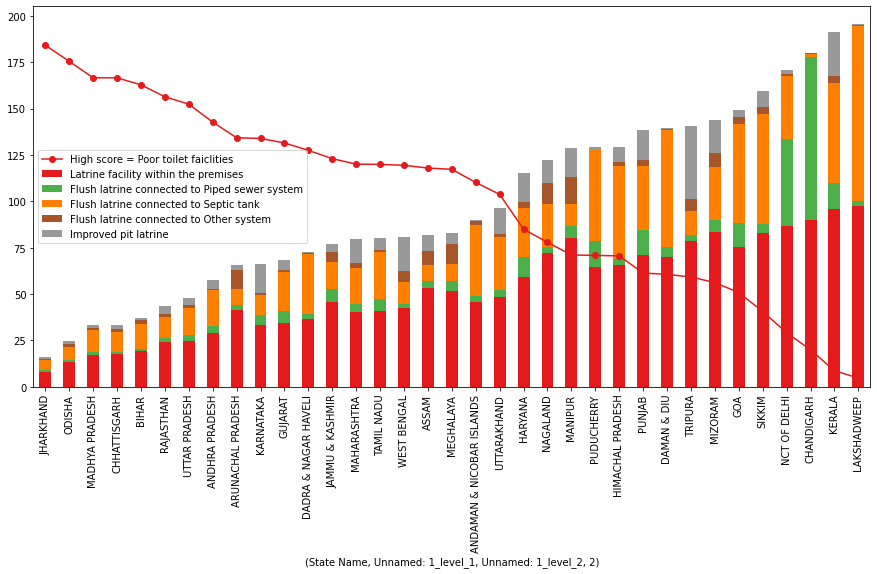

In [14]:
# Toilet facilities by state
fig,ax=plt.subplots(1,1,figsize=(15,7))
lat_df_1=df.groupby(('State Name', 'Unnamed: 1_level_1', 'Unnamed: 1_level_2', '2')).agg(
    {('Number of households having latrine facility within the premises', 'Unnamed: 90_level_1', 'Unnamed: 90_level_2', '91'):'mean',
    ('Flush/pour flush latrine connected to', 'Piped sewer system', 'Unnamed: 91_level_2', '92'):'mean',
    ('Flush/pour flush latrine connected to', 'Septic tank', 'Unnamed: 92_level_2', '93'):'mean',
    ('Flush/pour flush latrine connected to', 'Other system', 'Unnamed: 93_level_2', '94'):'mean',
    ('Pit latrine', 'With slab/\nventilated improved pit', 'Unnamed: 94_level_2', '95'):'mean'})
lat_df_2=df.groupby(('State Name', 'Unnamed: 1_level_1', 'Unnamed: 1_level_2', '2')).agg({
    ('Pit latrine', 'Without slab/  open pit', 'Unnamed: 95_level_2', '96'):'mean',
    ('Night soil disposed into open drain\n', 'Unnamed: 96_level_1', 'Unnamed: 96_level_2', '97'):'mean',
    ('Service Latrine', 'Night soil removed by human', 'Unnamed: 97_level_2', '98'):'mean',
    ('Service Latrine', 'Night soil serviced by animal', 'Unnamed: 98_level_2', '99'):'mean',
    ('Number of households not having latrine facility within the premises', 'Unnamed: 99_level_1', 'Unnamed: 99_level_2', '100'):'mean',
    ('Alternative source', 'Public latrine', 'Unnamed: 100_level_2', '101'):'mean',
    ('Alternative source', 'Open', 'Unnamed: 101_level_2', '102'):'mean'
})

lat_df_1['sum']=lat_df_1.sum(axis=1).values
lat_df_2['sum']=lat_df_2.sum(axis=1).values
legend_1=['High score = Poor toilet faiclities','Latrine facility within the premises',
    'Flush latrine connected to Piped sewer system',
    'Flush latrine connected to Septic tank',
    'Flush latrine connected to Other system',
    'Improved pit latrine']

lat_df_1.sort_values('sum').iloc[:,:-1].plot(kind='bar',stacked=True,ax=ax,
                                                colormap='Set1',title='',sharex=True)

lat_df_2.sort_values('sum',ascending=False).iloc[:,-1].plot(kind='line',legend=False,stacked=True,ax=ax,
                                             colormap='Set1',sharex=True,rot=90,style='o-')
plt.legend(legend_1)
plt.show()


# Inferences from "Toilet facilities by state"
1__) Around 50% households in all states have Latrine facility within the premises
2__) Chandigarh has highest percentage of households with Flush laterine connected with sewer system-
                Reason can be its planned development as a new city
3__) Second most used type of laterine facility in India is Flush Laterine connected to a septic tank -
                Higher percentage implies bad drainage service


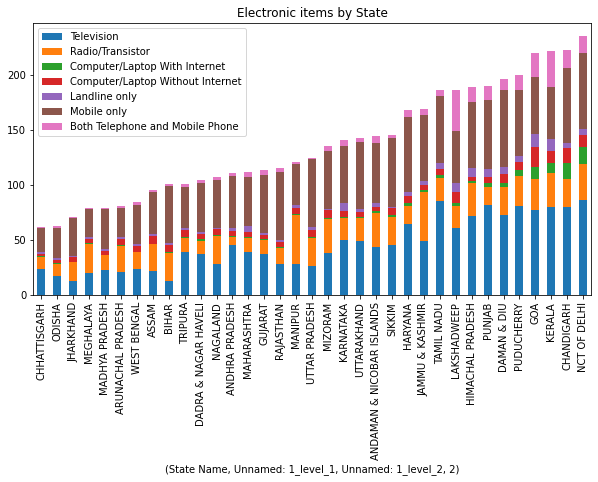

In [9]:
df_elec=df.groupby(('State Name', 'Unnamed: 1_level_1', 'Unnamed: 1_level_2', '2')).agg(
      {('Availability of assets', 'Television', 'Unnamed: 128_level_2', '129'): ['mean'],
       ('Availability of assets', 'Radio/\nTransistor', 'Unnamed: 127_level_2', '128'): ['mean'],
       ('Availability of assets', 'Computer/Laptop', 'With Internet', '130'): ['mean'],
       ('Availability of assets', 'Computer/Laptop', 'Without Internet', '131'): ['mean'],
       ('Availability of assets', 'Telephone/Mobile Phone', 'Landline only', '132'): ['mean'],
       ('Availability of assets', 'Telephone/Mobile Phone', 'Mobile only', '133'): ['mean'],
       ('Availability of assets', 'Telephone/Mobile Phone', 'Both', '134'): ['mean']})
legend=['Television', 'Radio/Transistor', 'Computer/Laptop With Internet', 'Computer/Laptop Without Internet',
       'Landline only', 'Mobile only', 'Both Telephone and Mobile Phone']

df_elec['sum']=df_elec.sum(axis=1).values
df_elec.sort_values('sum').iloc[:,:-1].plot(kind='bar',title="Electronic items by State",figsize=(10,5),stacked=True,legend=False)
plt.legend(legend)
plt.show()

#   Inferences from the "Electronic items by State"
1__) The states with most number of electronic items also have more number of population with :
                                                                a__) Computer/Laptop With Internet
                                                                b__) Both Telephone and Mobile Phone
2__) Tamil Nadu has highest percentage of Television sets 
3__) Manipur and Jammu & Kashmir have a high percentage of Radio sets
4__) Percentage of mobile phones is high in every state


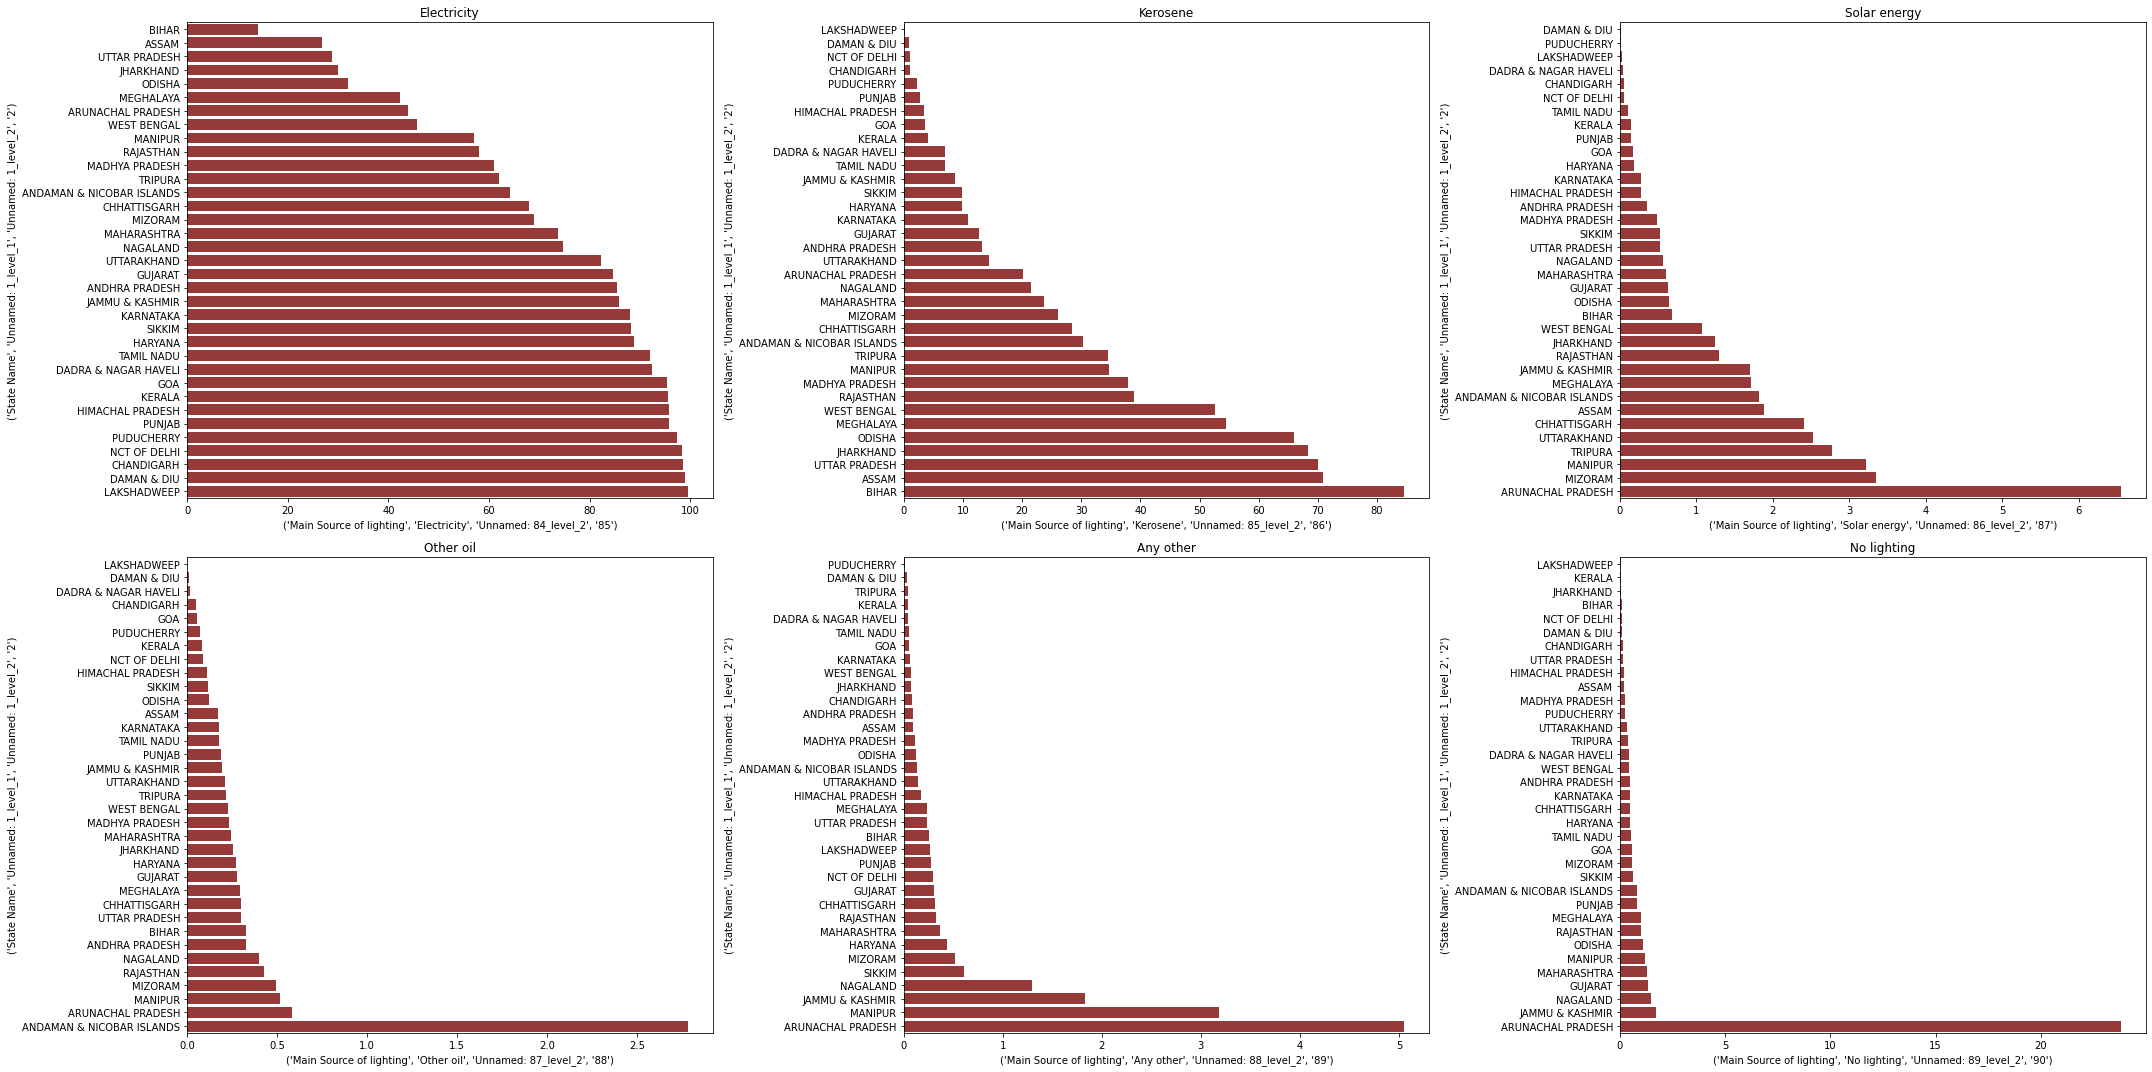

In [8]:
# Sources of lighting plot
fig,ax=plt.subplots(2,3,figsize=(30,15))
df_energy=df.groupby(('State Name', 'Unnamed: 1_level_1', 'Unnamed: 1_level_2', '2')).mean()[[
('Main Source of lighting', 'Electricity', 'Unnamed: 84_level_2', '85') ,
('Main Source of lighting', 'Kerosene', 'Unnamed: 85_level_2', '86') ,
('Main Source of lighting', 'Solar energy', 'Unnamed: 86_level_2', '87') ,
('Main Source of lighting', 'Other oil', 'Unnamed: 87_level_2', '88') ,
('Main Source of lighting', 'Any other', 'Unnamed: 88_level_2', '89') ,
('Main Source of lighting', 'No lighting', 'Unnamed: 89_level_2', '90')]]
for i,j in enumerate(ax.ravel()):
    val=df_energy.sort_values(df_energy.columns[i])
    sns.barplot(x=val[df_energy.columns[i]],y=val.index,ax=j,color='brown',orient='h')
    j.set_title(df_energy.columns[i][1])    
plt.tight_layout()
plt.show()

# Inferences from the "Sources of lighting plot"
1__) 
        a) Highly populated states like "Bihar", "Uttar Pradesh", "West Bengal" have less percentage of households with electricity 
                but high Kerosene usage.
        b) While other large states like "Delhi", "Punjab", "Himachal Pradesh" score high.
2__) North Eastern states have remarkably high percentage of households utilizing Solor Energy - 
                        It can possibly be due to lesser reach of grid based electricity resulting from the difficult terrain there.
3__) "Arunachal Pradesh" has highest percentage of households with "No lighting" - 
                        It might also explain their very high reliance on solar energy to light their homes

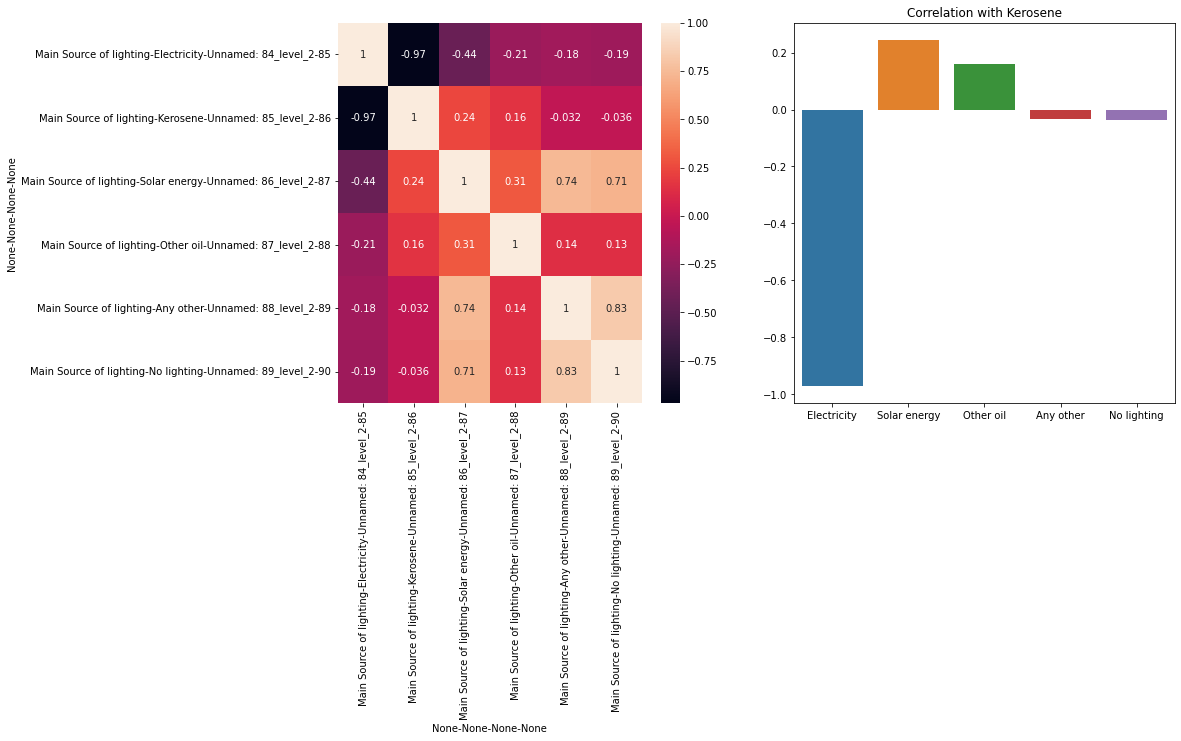

In [16]:
# Correlation of energy types with Kerosene
fig,ax=plt.subplots(1,2,figsize=(15,7))

index=['Electricity',
'Solar energy',
'Other oil',
'Any other',
'No lighting']
ind=df_energy.drop(('Main Source of lighting', 'Kerosene', 'Unnamed: 85_level_2', '86'),axis=1)
corr_=ind.corrwith(df_energy[('Main Source of lighting', 'Kerosene', 'Unnamed: 85_level_2', '86')])
sns.heatmap(df_energy.corr(),ax=ax[0],annot=True)
sns.barplot(x=index,y=corr_.values,ax=ax[1])
plt.title('Correlation with Kerosene')
plt.savefig('Energy correlation.jpeg', dpi=300,bbox_inches='tight')
plt.show()

We find a negative correlation between Households using electricity and those using Kerosene - which implies less reliance on Kerosene as 
electricity distribution increases